In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from collections import Counter # Count frequence of word in text
import language_tool_python

def grammarCorrector(text):
    print("Correcting grammar...: ", text)
    tool = language_tool_python.LanguageTool('en-US')
    result = tool.correct(text)
    print("Result: ", result)
    return result

In [2]:
data = pd.read_csv("../data/sms-data.csv")

Email Not Spam : 76.32 %
Spam Email : 23.68 %


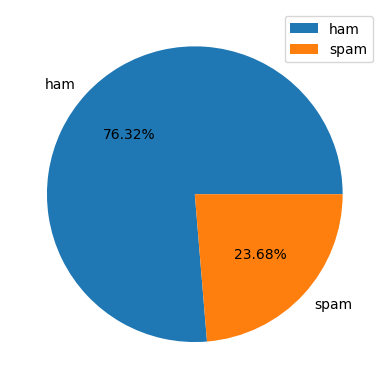

In [3]:
print(f"Email Not Spam : {round(data['label'].value_counts().iloc[0] / len(data) * 100, 2)} %")
print(f"Spam Email : {round(data['label'].value_counts().iloc[1] / len(data) * 100 , 2)} %")
plt.pie(data['label'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%");
plt.legend()

c:\Users\x\Documents\Github\spam-sms-detector-1123\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Email Not Spam : 50.0 %
Spam Email : 50.0 %


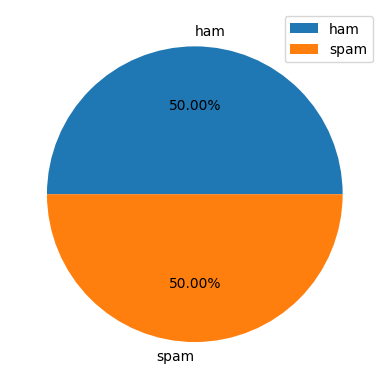

In [4]:
import numpy as np
from utils.sms_utils import balance_dataset, load_data_from_csv, preprocess_text

SMS_CSV_PATH = "../data/sms-data.csv"
X, Y = load_data_from_csv(SMS_CSV_PATH)
X = np.array([preprocess_text(x) for x in X])
X, Y = balance_dataset(X, Y)

print(f"Email Not Spam : {round(np.sum(Y == 0) / len(Y) * 100, 2)} %")
print(f"Spam Email : {round(np.sum(Y == 1) / len(Y) * 100 , 2)} %")
plt.pie([np.sum(Y == 0), np.sum(Y == 1)], labels=['ham', 'spam'], autopct="%.2f%%")
plt.legend()

In [5]:
data['num_characters'] = data['content'].apply(len)
data['num_words'] = data['content'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sent'] = data['content'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [6]:
data.describe()

,num_characters,num_words,num_sent
count,6692.000000,6692.000000,6692.000000
mean,111.829797,23.959653,2.590108
std,107.587666,21.020779,2.321514
min,2.000000,1.000000,1.000000
25%,40.000000,10.000000,1.000000
50%,77.000000,17.000000,2.000000
75%,144.000000,30.000000,3.000000
max,910.000000,196.000000,38.000000


In [7]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [8]:
# Create a function to generate cleaned data from raw text
def clean_text(text):
    text = nltk.word_tokenize(text) # Create tokens
    text= " ".join(text) # Join tokens
    text = [char for char in text if char not in string.punctuation] # Remove punctuations
    text = ''.join(text) # Join the leters
    text = [char for char in text if char not in re.findall(r"[0-9]", text)] # Remove Numbers
    text = ''.join(text) # Join the leters
    text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))] # Remove common english words (I, you, we,...)
    text = ' '.join(text) # Join the leters
    # text = list(map(lambda x: lan_stemmer.stem(x), text.split()))
    text = list(map(lambda x: port_stemmer.stem(x), text.split()))
    # text = list(map(lambda x: lemmatizer.lemmatize(x), text.split()))
    return " ".join(text)   # error word

In [9]:
data.head(10)

,label,content,num_characters,num_words,num_sent
0,ham,"Sorry chikku, my cell got some problem thts y ...",81,21,1
1,ham,Yes ammae....life takes lot of turns you can o...,85,19,1
2,spam,Maglaro sa pinakamalaking platform at makuha a...,136,23,3
3,ham,I'm used to it. I just hope my agents don't dr...,154,39,3
4,ham,Have you seen who's back at Holby?!,35,10,2
5,ham,that would be good _ I'll phone you tomo lunch...,83,19,1
6,ham,Nite nite pocay wocay luv u more than n e thin...,81,17,1
7,ham,Tell me pa. How is pain de.,27,8,1
8,ham,"Hello Bryce, I wanted to follow up on our last...",351,66,6
9,spam,<REAL NAME> Dive into our anniv! 500 gets you ...,84,19,4


In [10]:
data['clean_content'] = data['content'].apply(clean_text)
# data['clean_content'] = data['clean_content'].apply(grammarCorrector)

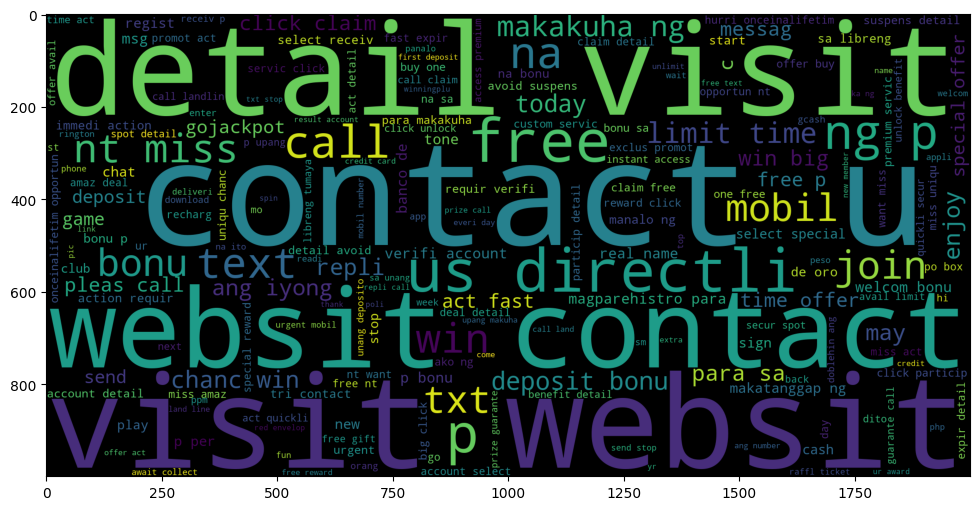

In [11]:
wc = WordCloud(width = 2000, height = 1000, min_font_size = 10, background_color = 'Black')
spam_ = wc.generate(data[data['label']=='spam']['clean_content'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_)

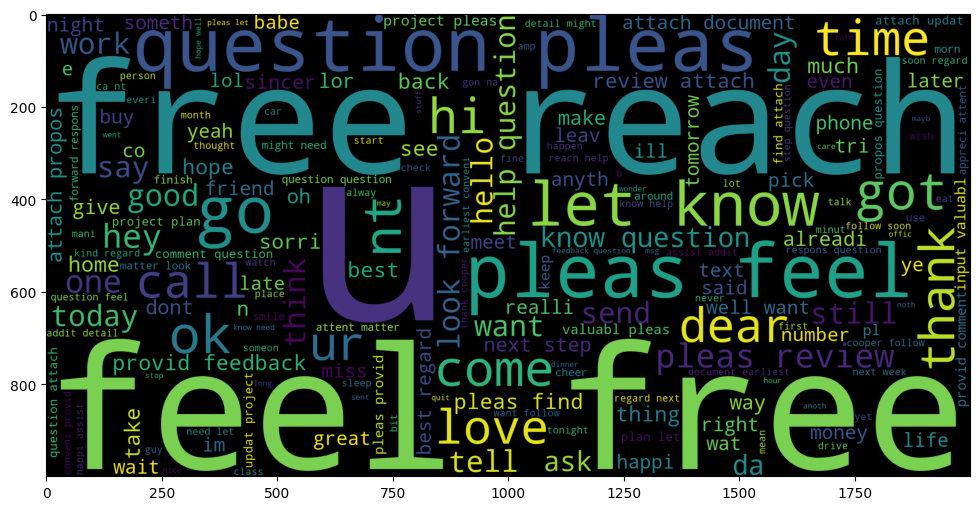

In [12]:
ham_ = wc.generate(data[data['label']=='ham']['clean_content'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'p'),
  Text(1, 0, 'free'),
  Text(2, 0, 'bonu'),
  Text(3, 0, 'call'),
  Text(4, 0, 'ng'),
  Text(5, 0, 'get'),
  Text(6, 0, 'sa'),
  Text(7, 0, 'claim'),
  Text(8, 0, 'contact'),
  Text(9, 0, 'win'),
  Text(10, 0, 'visit'),
  Text(11, 0, 'detail'),
  Text(12, 0, 'websit'),
  Text(13, 0, 'ang'),
  Text(14, 0, 'na'),
  Text(15, 0, 'us'),
  Text(16, 0, 'directli'),
  Text(17, 0, 'account'),
  Text(18, 0, 'u'),
  Text(19, 0, 'txt'),
  Text(20, 0, 'deposit'),
  Text(21, 0, 'mobil'),
  Text(22, 0, 'offer'),
  Text(23, 0, 'new'),
  Text(24, 0, 'click'),
  Text(25, 0, 'text'),
  Text(26, 0, 'ur'),
  Text(27, 0, 'para'),
  Text(28, 0, 'prize'),
  Text(29, 0, 'stop')])

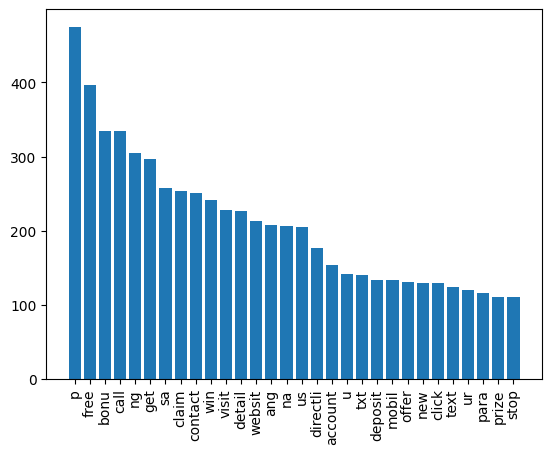

In [13]:
spam_word = []
for msg in data[data['label'] == 'spam']['clean_content'].tolist():
  for word in msg.split():
    spam_word.append(word)

plt.bar(pd.DataFrame(Counter(spam_word).most_common(30))[0], pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation = 'vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'pleas'),
  Text(1, 0, 'u'),
  Text(2, 0, 'question'),
  Text(3, 0, 'feel'),
  Text(4, 0, 'reach'),
  Text(5, 0, 'free'),
  Text(6, 0, 'know'),
  Text(7, 0, 'go'),
  Text(8, 0, 'let'),
  Text(9, 0, 'want'),
  Text(10, 0, 'get'),
  Text(11, 0, 'thank'),
  Text(12, 0, 'nt'),
  Text(13, 0, 'attach'),
  Text(14, 0, 'need'),
  Text(15, 0, 'hi'),
  Text(16, 0, 'come'),
  Text(17, 0, 'call'),
  Text(18, 0, 'project'),
  Text(19, 0, 'ok'),
  Text(20, 0, 'regard'),
  Text(21, 0, 'meet'),
  Text(22, 0, 'time'),
  Text(23, 0, 'next'),
  Text(24, 0, 'like'),
  Text(25, 0, 'got'),
  Text(26, 0, 'detail'),
  Text(27, 0, 'good'),
  Text(28, 0, 'love'),
  Text(29, 0, 'dear')])

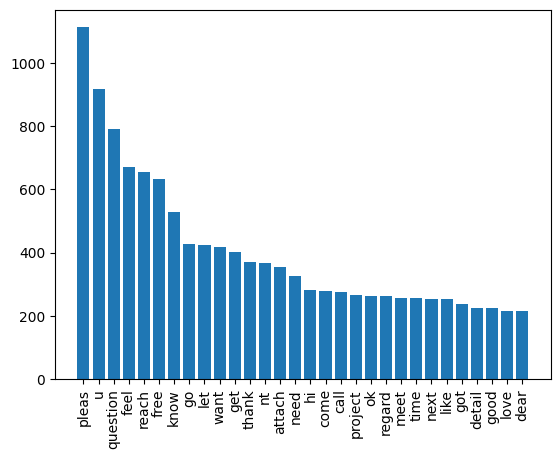

In [14]:
ham_word = []
for msg in data[data['label'] == 'ham']['clean_content'].tolist():
  for word in msg.split():
    ham_word.append(word)

plt.bar(pd.DataFrame(Counter(ham_word).most_common(30))[0], pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [15]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the labels
data['target'] = encoder.fit_transform(data['label'])